# Introduction to Pandas 2

### Let's get started

Importing pandas

In [1]:
import pandas as pd

#### Read in the CSV file

In [2]:
df = pd.read_csv('data/titanic.csv')

###  Recap 
- .describe()
- .shape
- .head()
- .tail()
- .sample(5)
- .dtypes
- .index
- .iloc[]
- .loc[]

In [7]:
# true = 1, add them up
df.isna().sum().sum()


In [7]:
mask_max_fare = df['fare'] == df['fare'].max()
df[mask_max_fare]

## Filtering DataFrames

#### Column selection

In [3]:
df['age'].head(2) # bracket notation

In [4]:
df.age.head(2) # dot notation

- Providing a **single column name within [brackets]** after the DataFrame name will return the given **Series**
- **Dot notation** can also be used to return single columns, although requires column_names with no spaces in the name, and cannot be used to create new columns
- **Bracket notation always works** but some people prefer dot notation when possible for readability.

In [ ]:
df[['survived','alone']].head(2)

- Providing **several column names in a list** will return a DataFrame with the given columns

In [ ]:
df_less_cols = df.drop(['class', 'embarked', 'alive'], axis=1)
df_less_cols.head()

- The `.drop()` method allows us to specify labels of rows or columns to drop
- The `axis` parameter determines whether the labels refer to rows (`0`, the default) or columns (`1`)
- We have assigned the result to a new variable; if we wanted to remove these columns from the original DataFrame, we need to add `inplace=True` when calling the method



### Row selection and masks

In [ ]:
is_male_mask = df['sex'] == 'male'

males = df[is_male_mask]
males.head()

```python
is_male_mask = df['sex'] == 'male'
```
- Will create a "mask" that allows to select only rows that match this condition.
- The mask is actually a series of `True` and `False`, that corresponds to whether or not the row should be kept

In [ ]:
is_male_mask.head()

```python
males = df[is_male_mask]
```
- Will apply the mask on our dataframe and filter the rows

In [ ]:
msk_female = df['sex'] == 'female'
msk_child = df['who'] == 'child'

girls = df[msk_female & msk_child]
girls.head()

We can combine multiple masks:

```python
girls = df[msk_female & msk_child]
```

*retrieve from `df` where `df['sex']` equals `'female'` and `df['who']` equals `'child'`*

### An example combining filtering and indexing

Finding the age of the first survivor in our DataFrame

In [ ]:
msk_survived = df['survived'] == 1 
survived = df[msk_survived]
survived.head(3)

In [ ]:
survived.iloc[0].loc['age']


- Here we have used `.iloc` (position-based) to access the first entry in the `survived` DataFrame, and then `.loc` (label-based) to access the `age` of this entry 
- using `.loc` in the first part of the statement would have thrown an error since there is no entry in the filtered DataFrame with a row index label of `0`

In [ ]:
details = survived.iloc[4].loc[['class', 'age']]
details

In [ ]:
details.name

- `details` here is itself a Series, with a `.name` attribute which is the row label (`9`) in addition to the requested values

### An example using filtering and string matching

Does `embarked` give us any different information to `embark_town`? (if not, we might decide to remove it)

In [ ]:
embark_mismatch = df['embarked'] != df['embark_town'].str[0]
df[embark_mismatch]

- Here we are querying `df` for any entries where `embarked` is not equal (`-!`) to the first character (`[0]`) in the string (`.str`) of the value in the `embark_town` column
- Two rows are returned, both of which have **missing values** in both columns, meaning that pandas cannot perform the comparison operation on them

In [ ]:
embark_info_avail = df['embarked'].notnull() | df['embark_town'].notnull()

- Here we have used the `.notnull()` method and the pipe (`|`) character, which is an **OR** operator
- Values in the resulting Series will be `True` if there is a value in either of the two columns


In [ ]:
df[embark_mismatch & embark_info_avail]

In [ ]:
df[embark_mismatch & ~embark_info_avail]

- We we have used the masks to filter our DataFrame, combining them with the `&` operator; both masks must be `True` for the given row to be returned
- Masks can be **inverted** (turning `True` to `False` and `False` to `True`) using a preceding `~`
- This approach can be useful if we are likely to want to **re-use** or **combine** different filters

### Sorting DataFrames

In [ ]:
df.sort_values(by='fare', ascending=False)

- The `sort_values()` method allows us to choose a column in the DataFrame by which to sort it
- The default `ascending` parameter is `True`

### pandas Series
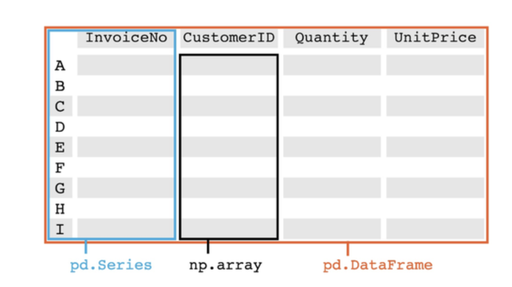

`np.array`  
A grid of values, all of the same data type, with an **integer-based index** (np is for **NumPy**, a package used by pandas) 

`pd.Series`  
A one-dimensional NumPy array with a **label-based index**; index labels can be integers or text  

`pd.DataFrame`  
A **two-dimensional labelled data structure** where columns can be of different data types, i.e. a **collection of Series** of equal length and the same index

#### Series methods

Some examples for numerical columns:

In [ ]:
df['age'].mean()

In [ ]:
df['age'].max()

In [ ]:
df['age'].std() # standard deviation

And for text columns:

In [ ]:
df['embark_town'].unique()

In [ ]:
df['embark_town'].unique().tolist()

- The `.unique()` pandas Series method returns a NumPy array
- `.tolist()` is a NumPy array method which returns a list of the values
- Notice how we can **chain** one method after another in a single line of code

In [ ]:
df['sex'].value_counts().to_list()

In [ ]:
df['sex'].value_counts().to_dict()

- Notice the slightly different method name here (`.to_list()` vs `.tolist()` from the previous example, which was called on a NumPy array)
- `to_list()` is the equivalent method in pandas for Series objects, which is what is returned by the `value_counts()` method
- In this example, a dictionary may be more useful, so we can be sure which number is related to each sex

#### Series attributes

In [ ]:
df['deck'].shape # the dimensions of the series

In [ ]:
df['deck'].index # if the index labels were strings, those would be returned

In [ ]:
df['deck'].hasnans # are there any nan values in the series?

- pandas Series objects have numerous **methods** and **attributes** available
- We can extract data from them into NumPy and Python data types
- See the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) for further examples  

### An example combining series methods with DataFrame filtering

In [ ]:
top_fare_origins = df[df['fare']==df['fare'].max()]['embark_town'].value_counts()

In [ ]:
top_fare_origins

    df[df['fare'] == df['fare'].max()]

- We selected only the rows from the DataFrame where the `fare` was equal to the `.max()` value in the `fare` column 

    ['embark_town'].value_counts()

- From the resulting DataFrame, we retrieved the `value_counts()` for the `embark_town` column

## Modifying DataFrames

#### Setting the index using values from a column

In [ ]:
df2 = df.set_index('embark_town')
df2.head()

In [ ]:
df2.index

In [ ]:
df3 = df.set_index('survived', drop=False)
df3.head()

In [ ]:
df3.index

- The `set_index` method can be used to set a given column as the index
- By default, the chosen column is dropped from the DataFrame 
    - Here we have overwritten the default parameter using `drop=False`; we see the `survived` values both as the index and as a column within the DataFrame itself

- Note how on each occasion we assigned the returned DataFrame to a new variable (`df2` or `df3`)  
    - When using the default parameters for the `.set_index` method, the original DataFrame is not itself modified

- We can assign the result to a new variable, or we can use the `inplace=True` parameter when calling the `set_index` method, which will modify the original DataFrame

- If we have an index which we would prefer to have as a normal data column, the `reset_index` method can be used
- Again use `inplace=True` if we want to modify the existing DataFrame

In [ ]:
df2.reset_index(inplace=True)
df2.head()


- Index values **do not have to be unique** and can be **numbers or text**
- The number of rows and row order remain unchanged
- Data columns can be used as the index and vice-versa

### Adding columns

`sibsp` is the number of siblings and partners the passenger had on board
`parch` is the number of parents and children the passenger had on board

In [ ]:
df['relatives'] = df['sibsp'] + df['parch']
df['relatives'].mean()

`sibsp` is the number of siblings and partners the passenger had on board  
`parch` is the number of parents and children the passenger had on board

- We can specify the name of the column and the calculation for the values in a single line
- If a column with the given name exists, its values will be overwritten. If not, a new column will be created

### Modifying column data

In [ ]:
df['survived'] = df['survived'].astype(bool)
df['survived'].value_counts()

- We used the `.astype()` method to change a column containing `1` and `0` values to `True` and `False` values
- Note that pandas will use the `float64` data type for a column containing both integers and missing values; for this reason we cannot convert the `age` column to `int`

#### `.map()`

To do a simple replacement `old value` -> `new value`, you can also use `.map()`:

```python
df['survived'].map({1: True, 0: False})
```

- You need to provide a dictionary that maps the old values to new ones

### Removing columns with `.drop()`

In [ ]:
df_new = df.drop(['embarked', 'class', 'alive'], axis=1)
df_new.head(3)

- We used the `.drop()` method with a list of labels and the `axis` on which to operate (without `axis=1` the method would search the row index labels for matches and throw an error if each label is not found)
- We could have used `inplace=True` on the original DataFrame, although this would be **destructive** in that the columns would be lost, and all of our code would need to be re-run to retrieve them

### Renaming columns with `.rename()`

In [ ]:
df_new.rename(columns={'pclass':'passenger_class', 
                       'sibsp':'siblings_partners', 
                       'parch':'parents_children'}
             ).head(3)

- The `.rename()` method allows us to modify column and row index labels
- The `columns` parameter can take a dictonary of **key:value pairs** where the key is the original label and the value is the new label

## Using functions to add or modify data

Here's a function to help us convert the strings in the `alive` column to boolean values:

In [ ]:
def alive_bool(text):
    
    return text == 'yes'

Notice that when we want a Boolean result from a statement, we do not need to create an `if: ... else: ...` code block; the statement itself (here being `text == 'yes'`) is sufficient, and the result will be returned.

#### `.apply()`

In [ ]:
df['alive'] = df['alive'].apply(alive_bool)
df['alive'].value_counts()

- We used the `.apply()` method to call the `alive_bool` function with the value in the `alive` column as the argument

### Applying functions with multiple arguments

Here's a more advanced example where we call `.apply()` on multiple columns at the same time. We will compare `pclass` and `class` to see if they are giving the same information:

In [ ]:
def check_class_cols(row):
    
    class_val = row["pclass"]
    class_text = row["class"]

    class_dict = {1: 'First', 2: 'Second', 3: 'Third'}
    
    return class_dict[class_val] == class_text   

In [ ]:
df['class_check'] = df[['pclass', 'class']].apply(check_class_cols, axis=1)

- Here the function receives a row with multiple columns instead of just one value
- You can access the columns in your function and return values accordingly
- `axis=1` is used to apply the function to each row of the DataFrame

In [ ]:
df['class_check'].sum() == len(df)

- We can use the `.sum()` method on a boolean column to count the number of `True` values
- We can find the number of rows in a DataFrame using the Python `len()` function
- The comparison operator `==` will return `True` if the compared values are equal

## Jupyter Exercise 

Part 2: Filtering, sorting, and modifying DataFrames

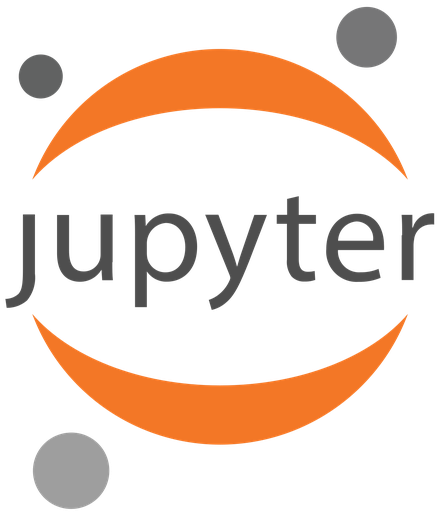

Open `intro-pandas-workbook3.ipynb`